In [1]:
from pandas import read_csv
from altair import *


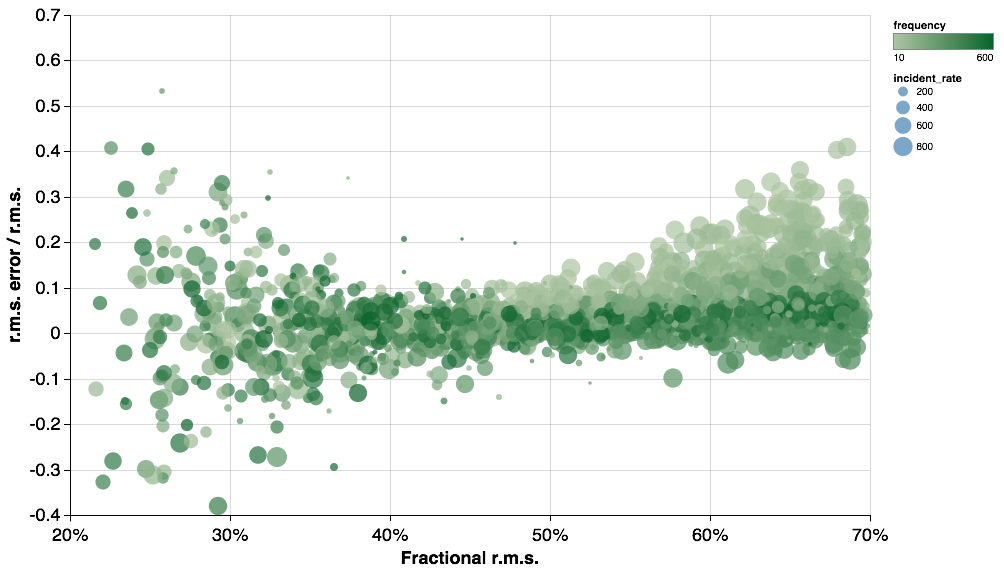

In [2]:
data = read_csv('results_allfreq.csv')
# data['frequency'] = data['frequency'] / 1000

rms_range = [0.2, 0.7]
cs_range = [-0.4, 0.6]
data = data[data['Frac_rms'].between(*rms_range, inclusive=True)]
data = data[data['CS'].between(*cs_range, inclusive=True)]

chart = Chart(data.dropna(),
              description='Blabla',
).mark_circle().encode(
    size=Size('incident_rate:Q'),
    x=X('Frac_rms:Q', scale=Scale(domain=rms_range),
        axis=Axis(titleFontSize=18, format='%', 
                  tickLabelFontSize=18, title='Fractional r.m.s.')
    ),
    y=Y('CS:Q', scale=Scale(domain=cs_range),
        axis=Axis(titleFontSize=18, format='.1', 
                  tickLabelFontSize=18, title='r.m.s. error / r.m.s.')
    ),
    color=Color('frequency:Q')
).configure_cell(
    height=500.0,
    width=800.0,
)
# chart.data.CS.contents
chart

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
from scipy.ndimage import gaussian_filter1d
import numpy as np

sns.set_context('talk')
sns.set_style("whitegrid")
sns.set_palette("colorblind")

mpl.rcParams['font.size'] = 24.0
mpl.rcParams['xtick.labelsize'] = 24.0
mpl.rcParams['ytick.labelsize'] = 24.0
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['axes.labelsize'] = 24.0
mpl.rcParams['axes.labelsize'] = 24.0
mpl.rcParams['legend.fontsize'] = 24.0

from astropy.table import Table

In [4]:
table_rn = Table.read('rn_nodt.csv')
table_wn = Table.read('wn_dt.csv')

In [5]:
freqs_all_rn = table_rn['freqs']
fourier_all_rn = table_rn['fourier1']
diff_all_rn = table_rn['fourier1'] - table_rn['fourier2']

freqs_all_wn = table_wn['freqs']
fourier_all_wn = table_wn['fourier1']
diff_all_wn = table_wn['fourier1'] - table_wn['fourier2']

dim_rn = len(list(set(freqs_all_rn)))
dim_wn = len(list(set(freqs_all_wn)))

new_shape_rn = (len(freqs_all_rn) // dim_rn, dim_rn)
new_shape_wn = (len(freqs_all_wn) // dim_wn, dim_wn)

mean_fourier_all_rn = np.mean(np.abs(fourier_all_rn.reshape(new_shape_rn)), axis=0)
mean_diff_all_rn = np.mean(np.abs(diff_all_rn.reshape(new_shape_rn)), axis=0)

smooth_fourier_all_rn = gaussian_filter1d(mean_fourier_all_rn, 1)
smooth_diff_all_rn = gaussian_filter1d(mean_diff_all_rn, 1)
smooth_freq_all_rn = freqs_all_rn[:dim_rn]

mean_fourier_all_wn = np.mean(np.abs(fourier_all_wn.reshape(new_shape_wn)), axis=0)
mean_diff_all_wn = np.mean(np.abs(diff_all_wn.reshape(new_shape_wn)), axis=0)

smooth_fourier_all_wn = gaussian_filter1d(mean_fourier_all_wn, 1)
smooth_diff_all_wn = gaussian_filter1d(mean_diff_all_wn, 1)
smooth_freq_all_wn = freqs_all_wn[:dim_wn]



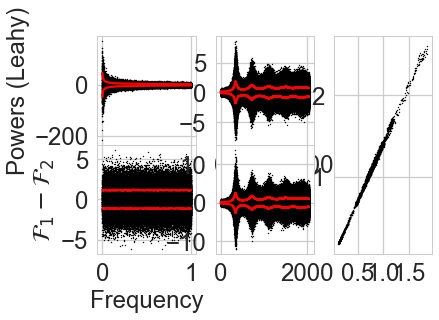

In [6]:
gs = GridSpec(2, 3, hspace=0)
rn_ax0 = plt.subplot(gs[0, 0])
rn_ax1 = plt.subplot(gs[1, 0], sharex=rn_ax0)
wn_ax0 = plt.subplot(gs[0, 1])
wn_ax1 = plt.subplot(gs[1, 1], sharex=wn_ax0)
vs_ax = plt.subplot(gs[:, 2])

rn_ax0.scatter(freqs_all_rn, fourier_all_rn, s=1, c='k')
rn_ax0.plot(smooth_freq_all_rn, smooth_fourier_all_rn, color='r')
rn_ax0.plot(smooth_freq_all_rn, -smooth_fourier_all_rn, color='r')

rn_ax1.scatter(freqs_all_rn, diff_all_rn, s=1, c='k')
rn_ax1.plot(smooth_freq_all_rn, smooth_diff_all_rn, color='r')
rn_ax1.plot(smooth_freq_all_rn, -smooth_diff_all_rn, color='r')

rn_ax0.set_ylabel('Powers (Leahy)')
rn_ax1.set_ylabel('$\mathcal{F}_1 - \mathcal{F}_2$')
rn_ax1.set_xlabel('Frequency')


# rn_ax0.semilogx()
wn_ax0.scatter(freqs_all_wn, fourier_all_wn, s=1, c='k')
wn_ax0.plot(smooth_freq_all_wn, smooth_fourier_all_wn, color='r')
wn_ax0.plot(smooth_freq_all_wn, -smooth_fourier_all_wn, color='r')

wn_ax1.scatter(freqs_all_wn, diff_all_wn, s=1, c='k')
wn_ax1.plot(smooth_freq_all_wn, smooth_diff_all_wn, color='r')
wn_ax1.plot(smooth_freq_all_wn, -smooth_diff_all_wn, color='r')

vs_ax.scatter(smooth_fourier_all_wn, smooth_diff_all_wn, s=1, c='k')

In [7]:
def slope(x, a=1):
    return a*x

def calculate_average_quantities(freq, fourier, diff):
    dim = len(list(set(freq)))
    new_shape = (len(freq) // dim, dim)

    mean_fourier = np.mean(np.abs(fourier.reshape(new_shape)), axis=0)
    mean_diff = np.mean(np.abs(diff.reshape(new_shape)), axis=0)

    smooth_freq = freq[:dim]
    return smooth_freq, mean_fourier, mean_diff


def plot_diff_vs_power(freq, fourier, diff, show_corr=False):
    fig = plt.figure(figsize=(10, 10))
    gs = GridSpec(2, 2, hspace=0, wspace=0)
    ax00 = plt.subplot(gs[0, 0])
    ax01 = plt.subplot(gs[0, 0])

    ax10 = plt.subplot(gs[1, 0], sharex=ax00)
    ax11 = plt.subplot(gs[1, 1], sharey=ax10)

    scatter = ax10.scatter(fourier, diff, c='k', s=1, alpha=0.6)
    ax00.scatter(fourier, freq, c='k', s=1, alpha=0.6)
    ax11.scatter(freq, diff, c='k', s=1, alpha=0.6)
    
    smooth_freq, mean_fourier, mean_diff = \
        calculate_average_quantities(freq, fourier, diff)
    smooth_fourier = gaussian_filter1d(mean_fourier, 1)
    smooth_diff = gaussian_filter1d(mean_diff, 1)
    
    ax00.plot(-smooth_fourier, smooth_freq, color='r')
    ax00.plot(smooth_fourier, smooth_freq, color='r')
    smooth_points, = ax10.plot(smooth_fourier, smooth_diff, color='r', zorder=10)
    ax10.plot(-smooth_fourier, -smooth_diff, color='r', zorder=10)
    ax11.plot(smooth_freq, -smooth_diff, color='r')
    ax11.plot(smooth_freq, smooth_diff, color='r')

    lines_for_legend = [scatter, smooth_points]
    names_for_legend = ['Data', r'$\pm$ Mean(Abs(Data))']
    if show_corr:
        xplot = np.linspace(-np.max(diff), np.max(diff), 1000)

        slope_line, = \
            ax10.plot(slope(xplot, 2**(-0.5)), xplot, color='grey', ls='--', zorder=2)
        lines_for_legend.append(slope_line)
        names_for_legend.append(r'$y = \sqrt{2}x$')
        
    plt.setp(ax00.get_xticklabels(), visible=False)
    plt.setp(ax11.get_yticklabels(), visible=False)

    ax00.set_ylabel('Frequency (Hz)')
    ax10.set_ylabel('$\mathcal{F}_1 - \mathcal{F}_2$')
    ax10.set_xlabel('$\mathcal{F}_1$')
    ax11.set_xlabel('Frequency (Hz)')
    ax01.legend(lines_for_legend, names_for_legend, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    return fig

    

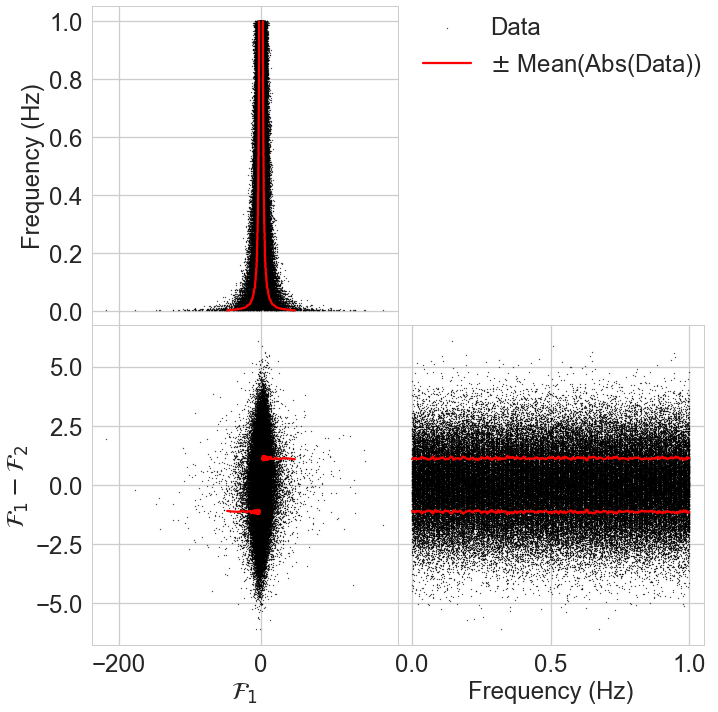

In [8]:
plot_diff_vs_power(freqs_all_rn, fourier_all_rn, diff_all_rn)
plt.savefig('rn_fourierdiff.jpg')

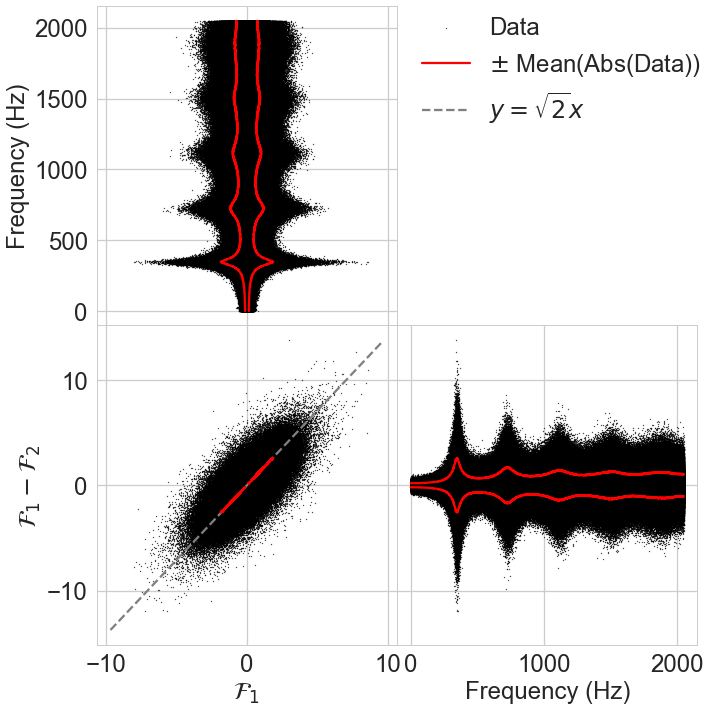

In [9]:
plot_diff_vs_power(freqs_all_wn, fourier_all_wn, diff_all_wn, show_corr=True)
plt.savefig('wn_fourierdiff.jpg')